<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Caso_Practico_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="font-size: 200%; font-weight: bold; color: maroon; line-height: 32px">Módulo VI: Frameworks
de Inteligencia Artificial</div>
<!-- ThreePoints 2020 - v.1.0 -->


<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">Caso práctico final </div>

   * tomando como fuente de datos un dataset de electronics, se va analizar lo siguiente:
    * Análisis exploratorio de los datos
    * Procesado de texto
    * Entrenamiento de un modelo de análisis de sentimiento
    * Registro de métricas en distintos experimentos con MLflow
    * Visualización de métricas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline
print(pd.__version__)


1.5.3


In [ ]:
# Clonar repositorio en Github
!git clone https://github.com/jserrataylor/cursoAI

Cloning into 'cursoAI'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 217 (delta 60), reused 67 (delta 22), pack-reused 76
Receiving objects: 100% (217/217), 7.19 MiB | 26.97 MiB/s, done.
Resolving deltas: 100% (92/92), done.


### Se carga Dataset Electronica

* Se visualiza la información de los primero 5 filas de la dataset en json importada.
* Luego se valida cuantos registros hay y columnas que tiene nuestra información con el shape.
* Luego validamos el tipo de dato de cada columna.


In [ ]:
df = pd.read_json(r"/content/cursoAI/datos/Games1.json", lines=True, orient='columns',encoding='utf-8')

DataFrame = pd.DataFrame(df)
DataFrame.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2,Couldn't get this one to work,1391817600,"02 8, 2014"
1,A38NXTZUFB1O2K,0700099867,FiSH,"[1, 1]",I'm not quite finished with the game's DiRT To...,5,Best in the series!,1309219200,"06 28, 2011"
2,ANW6EGY12V5XS,0700099867,Henri Savin,"[0, 0]",I have been playing car racing games since the...,5,A 5 stars winner!,1318982400,"10 19, 2011"
3,AHT34BRYFBFT1,0700099867,hewimp,"[0, 1]",Dirt 3 on DVDi collect racing games so had to ...,5,Cars,1388275200,"12 29, 2013"
4,A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"[0, 0]",I bought this and the key didn't work. It was...,1,"It might have been a good game, but I never fo...",1404086400,"06 30, 2014"


In [ ]:
df.shape

(627, 9)

#### Se asigna una nuevas  Columnas en la Dataset que va hacer la referencia principal
* Se deja como positivo las calificaciones 4 y 5, adicional se crea un atributo en valor númerico donde este rango queda en 1
* Se deje como negativo las calificaciones 1 y 2, adicional se crea un atributo en valor númerico donde este rango queda en 0
* Se deja como neutro las calificaciones 3, , adicional se crea un atributo en valor númerico donde este rango queda en 2

In [ ]:
df.loc[DataFrame['overall'] == 5, 'category'] = 'Positivo'
df.loc[DataFrame['overall'] == 4, 'category'] = 'Positivo'
df.loc[DataFrame['overall'] == 3, 'category'] = 'Neutro'
df.loc[DataFrame['overall'] == 2, 'category'] = 'Negativo'
df.loc[DataFrame['overall'] == 1, 'category'] = 'Negativo'

print (df)

         reviewerID        asin                  reviewerName helpful  \
0    A2JLT2WY0F2HVI  0700099867                 D. Sweetapple  [1, 1]   
1    A38NXTZUFB1O2K  0700099867                          FiSH  [1, 1]   
2     ANW6EGY12V5XS  0700099867                   Henri Savin  [0, 0]   
3     AHT34BRYFBFT1  0700099867                        hewimp  [0, 1]   
4    A248LSBZT4P38V  0700099867             Joseph R. Kennedy  [0, 0]   
..              ...         ...                           ...     ...   
622  A1WBAPIEEV79JC  B00000DMB3  Andrew "Strength and honor."  [0, 0]   
623   ADX5HZ4W4F4XI  B00000DMB3               Arnout Koeneman  [2, 2]   
624  A134F9G6MBP6MQ  B00000DMB3                        Ashley  [0, 0]   
625  A38MZX4OMBBXIC  B00000DMB3                 "atlantis_az"  [2, 2]   
626  A1R602SXNGOMJ4  B00000DMB3                      A. Vegan  [0, 1]   

                                            reviewText  overall  \
0    I still haven't figured this one out. Did ever...  

In [ ]:
df.loc[DataFrame['overall'] == 5, 'categoryNum'] = 1
df.loc[DataFrame['overall'] == 4, 'categoryNum'] = 1
df.loc[DataFrame['overall'] == 3, 'categoryNum'] = 2
df.loc[DataFrame['overall'] == 2, 'categoryNum'] = 0
df.loc[DataFrame['overall'] == 1, 'categoryNum'] = 0

print (df)

         reviewerID        asin                  reviewerName helpful  \
0    A2JLT2WY0F2HVI  0700099867                 D. Sweetapple  [1, 1]   
1    A38NXTZUFB1O2K  0700099867                          FiSH  [1, 1]   
2     ANW6EGY12V5XS  0700099867                   Henri Savin  [0, 0]   
3     AHT34BRYFBFT1  0700099867                        hewimp  [0, 1]   
4    A248LSBZT4P38V  0700099867             Joseph R. Kennedy  [0, 0]   
..              ...         ...                           ...     ...   
622  A1WBAPIEEV79JC  B00000DMB3  Andrew "Strength and honor."  [0, 0]   
623   ADX5HZ4W4F4XI  B00000DMB3               Arnout Koeneman  [2, 2]   
624  A134F9G6MBP6MQ  B00000DMB3                        Ashley  [0, 0]   
625  A38MZX4OMBBXIC  B00000DMB3                 "atlantis_az"  [2, 2]   
626  A1R602SXNGOMJ4  B00000DMB3                      A. Vegan  [0, 1]   

                                            reviewText  overall  \
0    I still haven't figured this one out. Did ever...  

In [ ]:
DataFrame.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,categoryNum
0,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2,Couldn't get this one to work,1391817600,"02 8, 2014",Negativo,0.0
1,A38NXTZUFB1O2K,0700099867,FiSH,"[1, 1]",I'm not quite finished with the game's DiRT To...,5,Best in the series!,1309219200,"06 28, 2011",Positivo,1.0
2,ANW6EGY12V5XS,0700099867,Henri Savin,"[0, 0]",I have been playing car racing games since the...,5,A 5 stars winner!,1318982400,"10 19, 2011",Positivo,1.0
3,AHT34BRYFBFT1,0700099867,hewimp,"[0, 1]",Dirt 3 on DVDi collect racing games so had to ...,5,Cars,1388275200,"12 29, 2013",Positivo,1.0
4,A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"[0, 0]",I bought this and the key didn't work. It was...,1,"It might have been a good game, but I never fo...",1404086400,"06 30, 2014",Negativo,0.0


In [ ]:
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall             int64
summary            object
unixReviewTime      int64
reviewTime         object
category           object
categoryNum       float64
dtype: object

### Visualización de datos
* Se crea un histograma, con la calificación de cada elemento, donde se va a evidenciar que la mayor calificación es 5.

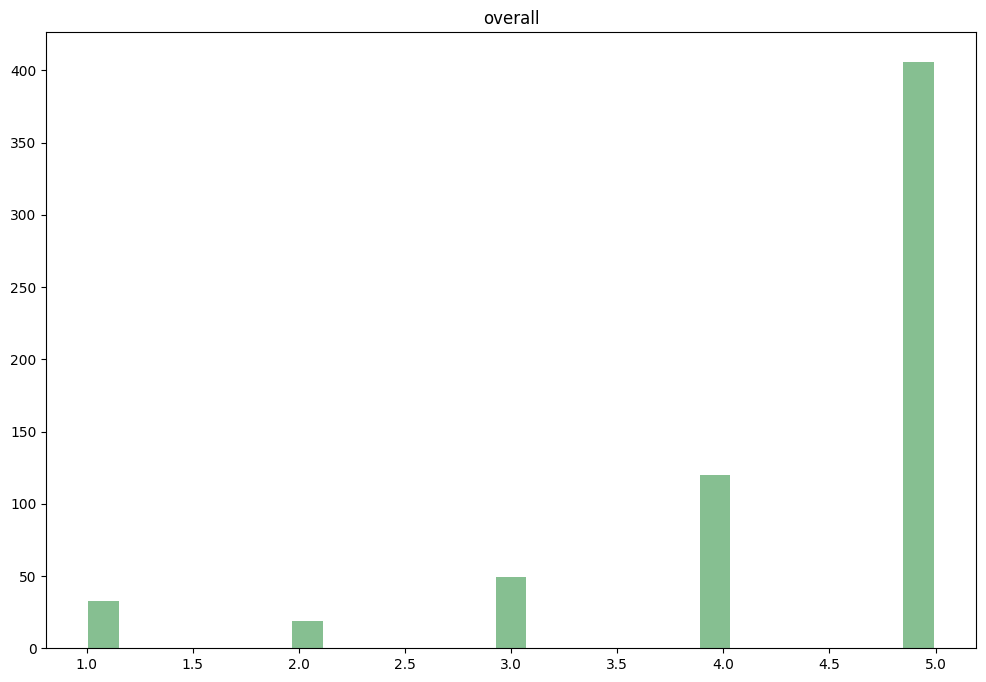

In [ ]:
import matplotlib.pyplot as plt
df.hist(column='overall', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">Generación graficos con Plotly Express</div>

* Hay tres convenciones comunes para almacenar datos orientados a columnas, generalmente en un marco de datos con nombres de columna
    *  ofrece sintaxis abreviada para crear muchos tipos de gráficos. Cada uno viene con diferentes parámetros y comprender los parámetros es la clave del encanto de Plotly.Express.

In [ ]:
import plotly.express as px

In [ ]:
df.keys()

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'category',
       'categoryNum'],
      dtype='object')

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,categoryNum
0,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2,Couldn't get this one to work,1391817600,"02 8, 2014",Negativo,0.0
1,A38NXTZUFB1O2K,0700099867,FiSH,"[1, 1]",I'm not quite finished with the game's DiRT To...,5,Best in the series!,1309219200,"06 28, 2011",Positivo,1.0
2,ANW6EGY12V5XS,0700099867,Henri Savin,"[0, 0]",I have been playing car racing games since the...,5,A 5 stars winner!,1318982400,"10 19, 2011",Positivo,1.0
3,AHT34BRYFBFT1,0700099867,hewimp,"[0, 1]",Dirt 3 on DVDi collect racing games so had to ...,5,Cars,1388275200,"12 29, 2013",Positivo,1.0
4,A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"[0, 0]",I bought this and the key didn't work. It was...,1,"It might have been a good game, but I never fo...",1404086400,"06 30, 2014",Negativo,0.0


In [ ]:
fig = px.scatter(df, x='reviewTime', y='overall', color='category', size='overall')
fig.show()

In [ ]:

fig = px.bar(df, x='categoryNum', y='overall', color='category', labels={'y':'gdp'},
             hover_data=['categoryNum'],
             title='Medición Categorias de Calificación Electrónica')
fig.show()

#### Observaciones

* En los diagramas de Plotly scatter, se observa la agrupación de la información de acuerdo a lo estipulado en xy, se observa en la imagen donde las categorias, se agrupan por su respectivo calificación.
* En el diagrama de Plotly bar, se ve como discrimina la información donde donde deja la categoria positiva azul con mayor calificación.


<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">Extracción bigramas y trigramas</div>

* Un modelo de n-grama es un tipo de modelo probabilístico que permite hacer una predicción estadística del próximo elemento de cierta secuencia de elementos sucedida hasta el momento. Un modelo de n-grama puede ser definido por una cadena de Márkov de orden n-1.
* En el siguiente proceso, se puede realizar una normalización donde se deje el texto en minisculas y se emplea un tokenizer en palabras.

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist
text = ''
for row in df.reviewText:
     text = text + row

words_nltk = text.lower().split()
words_nltk[:20]

['i',
 'still',
 "haven't",
 'figured',
 'this',
 'one',
 'out.',
 'did',
 'everything',
 'as',
 'instructed',
 'but',
 'the',
 'game',
 'never',
 'installed.',
 'strange.',
 'since',
 'i',
 "don't"]

In [ ]:
len(words_nltk)

99612

* Creamos un diccionario con el vocabulario (palabras/tokens presentes en el texto) y el número de veces que aparecen.

In [ ]:
from collections import Counter
wf = Counter(words_nltk)

* Podemos ordenar por frecuencia. Por ejemplo, los 20 tokens más frecuentes son:

In [ ]:
wf_most_common = wf.most_common(20)
wf_most_common

[('the', 5590),
 ('and', 2794),
 ('to', 2639),
 ('a', 2504),
 ('of', 2098),
 ('you', 1862),
 ('is', 1841),
 ('game', 1514),
 ('i', 1487),
 ('this', 1339),
 ('it', 1320),
 ('in', 1245),
 ('that', 998),
 ('for', 890),
 ('but', 761),
 ('are', 753),
 ('have', 670),
 ('with', 655),
 ('was', 649),
 ('on', 589)]

* Se visualiza los resultados en un diagrama de barras, donde se evidencia la cantidad de veces que se repite una palabra en el texto, como se observa en el diagrama de abajo la palabra de, es la más repetida, debemos tener encuenta que se tomo de un rango muy pequeño de la información.

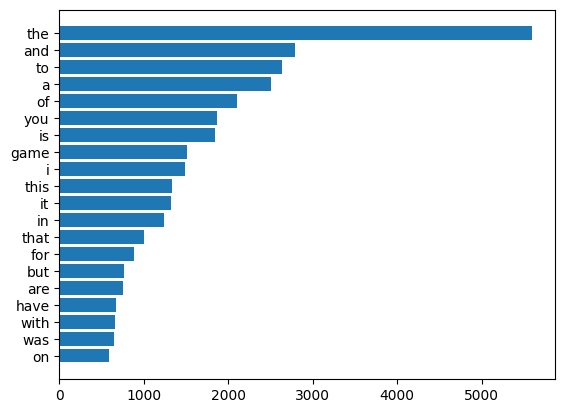

In [ ]:
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]
freqs, words = zip(*sorted(zip(freqs, words)))

plt.barh(words, freqs)
plt.show()

* Obtendremos los bigramas y trigramas en el texto.

In [ ]:
bigrams_ = list(ngrams(words_nltk, 2))
trigrams_ = list(ngrams(words_nltk, 3))

+  Los 20 primeros bigramas:
  * Un bigrama o digrama es un grupos de dos letras, dos sílabas, o dos palabras. Los bigramas son utilizados comúnmente como base para el simple análisis estadístico de texto. Se utilizan en uno de los más exitosos modelos de lenguaje para el reconocimiento de voz. Se trata de un caso especial del N-grama

In [ ]:
bigrams_[:20]

[('i', 'still'),
 ('still', "haven't"),
 ("haven't", 'figured'),
 ('figured', 'this'),
 ('this', 'one'),
 ('one', 'out.'),
 ('out.', 'did'),
 ('did', 'everything'),
 ('everything', 'as'),
 ('as', 'instructed'),
 ('instructed', 'but'),
 ('but', 'the'),
 ('the', 'game'),
 ('game', 'never'),
 ('never', 'installed.'),
 ('installed.', 'strange.'),
 ('strange.', 'since'),
 ('since', 'i'),
 ('i', "don't"),
 ("don't", 'like')]

* Los 20 primeros trigramas:

In [ ]:
trigrams_[:20]

[('i', 'still', "haven't"),
 ('still', "haven't", 'figured'),
 ("haven't", 'figured', 'this'),
 ('figured', 'this', 'one'),
 ('this', 'one', 'out.'),
 ('one', 'out.', 'did'),
 ('out.', 'did', 'everything'),
 ('did', 'everything', 'as'),
 ('everything', 'as', 'instructed'),
 ('as', 'instructed', 'but'),
 ('instructed', 'but', 'the'),
 ('but', 'the', 'game'),
 ('the', 'game', 'never'),
 ('game', 'never', 'installed.'),
 ('never', 'installed.', 'strange.'),
 ('installed.', 'strange.', 'since'),
 ('strange.', 'since', 'i'),
 ('since', 'i', "don't"),
 ('i', "don't", 'like'),
 ("don't", 'like', 'to')]

* Podemos calcular y representar los bigramas y trigramas más comunes de la siguiente manera:

In [ ]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

bg_freq_most_common = bg_freq.most_common(15)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(15)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

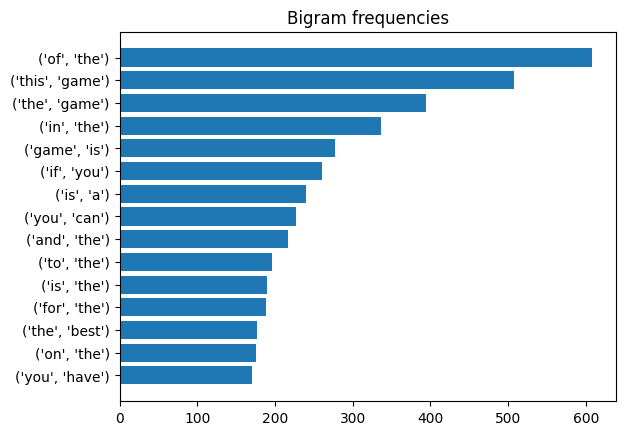

In [ ]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

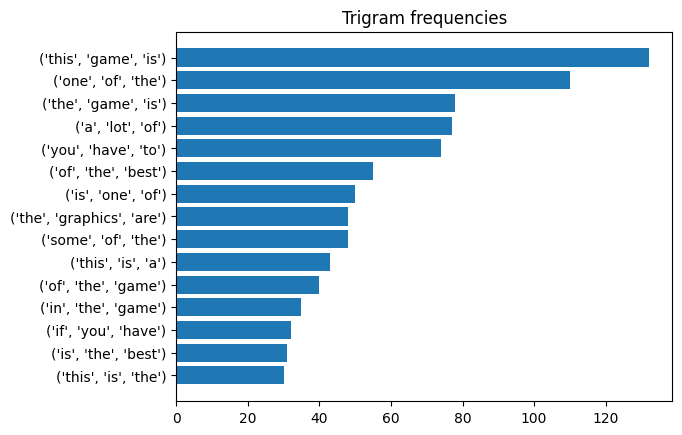

In [ ]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

*  Con estos resultado se puede observar un conjunto de palabras clave y n-gramas principales, en nuestro ejemplo el texto de dos y tres palabras (bigramas y trigramas). Estas listas y gráficos son, por supuesto, solo una pista de toda la información que podría estar contenida en el texto, pero brindan orientación sobre dónde podríamos necesitar mirar más de cerca o realizar investigaciones adicionales.
* Los n-gramas sintácticos están destinadas a reflejar la estructura sintáctica más fielmente que los n-gramas lineales, y tienen muchas de las mismas aplicaciones, especialmente como características en un modelo de espacio vectorial. Los n-gramas sintácticos dan mejores resultados que el uso de n-gramas estándar para ciertas tareas, por ejemplo, para atribución de autoría.


<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 38px">Preprocesado de texto</div>
  
  * Se agrupa todos los texto de la columna reviewText por unico.
  * **Tokenizing** : Es la división de texto o cadenas de texto en partes más pequeñas como frases, palabras o símbolos, utilizando así un concepto como el de “divide y vencerás“. El resultado de hacer el Tokenizing será una lista de Tokens.
      * Por ejemplo, si aplicamos el Tokenizing a un párrafo el resultado será una lista de tokens los cuales estarán compuestos de oraciones, si hacemos lo mismo, pero para una oración obtendremos una lista de tokens compuestos por las palabras que componen dicha oración.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

* Se agrupa toda la información que se obtine en el reviewText y se deja en una vaiable.
* Se aplica la normalización del texto reviewText, todo a minuscula.
* Se limita el texto a 2.000 palabras ya que el archivo es demasiado pesado.

In [ ]:
text = [text.lower() for text in df.reviewText]
text = str(text)
text = text[:2000]
print(text)

["i still haven't figured this one out. did everything as instructed but the game never installed. strange. since i don't like to rate on something i couldn't get to work, i'll just say that i didn't like it because i couldn't get it to work :p for those that did manage to get it installed, i'm sure it's a great game. i had the first dirt and it was a scream! too bad this one bombed. maybe a bad disc...", "i'm not quite finished with the game's dirt tour mode, but i believe i've experienced the bulk of what the game has to offer.  and i'm happy to say that the game is indeed awesome.  great cars, great tracks and racing modes, excellent gameplay and graphics.  the highlight has been racing in the snow on various tracks in aspen.  there are also some really cool obstacle courses on pavement, which are new to the series.at first, i felt that the game was plagued with the same difficulty spike dirt 2 had, where you can win any race without trying on casual difficulty, then lose big time o

In [ ]:
print(df.reviewText)

0      I still haven't figured this one out. Did ever...
1      I'm not quite finished with the game's DiRT To...
2      I have been playing car racing games since the...
3      Dirt 3 on DVDi collect racing games so had to ...
4      I bought this and the key didn't work.  It was...
                             ...                        
622    Very fun game to play, and has an excellent st...
623    I'll make it short...I hope.I'm not particular...
624    I was worried about getting this but I did any...
625    I have played all the other Zelda Series Games...
626    I was always a fan of Zelda when it first came...
Name: reviewText, Length: 627, dtype: object


In [ ]:
print(type(text))

<class 'str'>


In [ ]:
sentences = text.split('.')

for idx, word in enumerate(sentences):
    print('Frase {0:4}{1:4}'.format(str(idx), word))
    if idx==10:  # mostramos solo las 4 primeras frases
        break

Frase 0   ["i still haven't figured this one out
Frase 1    did everything as instructed but the game never installed
Frase 2    strange
Frase 3    since i don't like to rate on something i couldn't get to work, i'll just say that i didn't like it because i couldn't get it to work :p for those that did manage to get it installed, i'm sure it's a great game
Frase 4    i had the first dirt and it was a scream! too bad this one bombed
Frase 5    maybe a bad disc
Frase 6       
Frase 7       
Frase 8   ", "i'm not quite finished with the game's dirt tour mode, but i believe i've experienced the bulk of what the game has to offer
Frase 9     and i'm happy to say that the game is indeed awesome
Frase 10    great cars, great tracks and racing modes, excellent gameplay and graphics


#### Divide los párrafos en oraciones tal cual como es la tokenización sent_tokenize, como se observa en el siguiente resulta obtenemos un vector con token por cada frase, sin embargo esta manera resulta no tan efectiva para cuando tenemos un montón de texto.

In [ ]:
import nltk
nltk.download('punkt')
print(sent_tokenize(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['["i still haven\'t figured this one out.', 'did everything as instructed but the game never installed.', 'strange.', "since i don't like to rate on something i couldn't get to work, i'll just say that i didn't like it because i couldn't get it to work :p for those that did manage to get it installed, i'm sure it's a great game.", 'i had the first dirt and it was a scream!', 'too bad this one bombed.', 'maybe a bad disc...", "i\'m not quite finished with the game\'s dirt tour mode, but i believe i\'ve experienced the bulk of what the game has to offer.', "and i'm happy to say that the game is indeed awesome.", 'great cars, great tracks and racing modes, excellent gameplay and graphics.', 'the highlight has been racing in the snow on various tracks in aspen.', 'there are also some really cool obstacle courses on pavement, which are new to the series.at first, i felt that the game was plagued with the same difficulty spike dirt 2 had, where you can win any race without trying on casual 

#### Divide la oración en palabras tal cual como es la tokenización word_tokenize, básicamente nos generará una lista de palabras resultantes del texto que se está manejando.

* Esto trabaja separando las palabras utilizando los espacios y la puntuación, como podemos ver este tipo de tokenize no descarta la puntuación que se encuentra en el texto y las utiliza como tokens.

In [ ]:
print(word_tokenize(text))

['[', '``', 'i', 'still', 'have', "n't", 'figured', 'this', 'one', 'out', '.', 'did', 'everything', 'as', 'instructed', 'but', 'the', 'game', 'never', 'installed', '.', 'strange', '.', 'since', 'i', 'do', "n't", 'like', 'to', 'rate', 'on', 'something', 'i', 'could', "n't", 'get', 'to', 'work', ',', 'i', "'ll", 'just', 'say', 'that', 'i', 'did', "n't", 'like', 'it', 'because', 'i', 'could', "n't", 'get', 'it', 'to', 'work', ':', 'p', 'for', 'those', 'that', 'did', 'manage', 'to', 'get', 'it', 'installed', ',', 'i', "'m", 'sure', 'it', "'s", 'a', 'great', 'game', '.', 'i', 'had', 'the', 'first', 'dirt', 'and', 'it', 'was', 'a', 'scream', '!', 'too', 'bad', 'this', 'one', 'bombed', '.', 'maybe', 'a', 'bad', 'disc', '...', "''", ',', '``', 'i', "'m", 'not', 'quite', 'finished', 'with', 'the', 'game', "'s", 'dirt', 'tour', 'mode', ',', 'but', 'i', 'believe', 'i', "'ve", 'experienced', 'the', 'bulk', 'of', 'what', 'the', 'game', 'has', 'to', 'offer', '.', 'and', 'i', "'m", 'happy', 'to', 'sa

#### Definición	de	criterios	de	separación	usando
* En el siguiente ejemplo vamos a realizar un separador	por	espacios

In [ ]:
print(regexp_tokenize(text,"[\w’]+"))

['i', 'still', 'haven', 't', 'figured', 'this', 'one', 'out', 'did', 'everything', 'as', 'instructed', 'but', 'the', 'game', 'never', 'installed', 'strange', 'since', 'i', 'don', 't', 'like', 'to', 'rate', 'on', 'something', 'i', 'couldn', 't', 'get', 'to', 'work', 'i', 'll', 'just', 'say', 'that', 'i', 'didn', 't', 'like', 'it', 'because', 'i', 'couldn', 't', 'get', 'it', 'to', 'work', 'p', 'for', 'those', 'that', 'did', 'manage', 'to', 'get', 'it', 'installed', 'i', 'm', 'sure', 'it', 's', 'a', 'great', 'game', 'i', 'had', 'the', 'first', 'dirt', 'and', 'it', 'was', 'a', 'scream', 'too', 'bad', 'this', 'one', 'bombed', 'maybe', 'a', 'bad', 'disc', 'i', 'm', 'not', 'quite', 'finished', 'with', 'the', 'game', 's', 'dirt', 'tour', 'mode', 'but', 'i', 'believe', 'i', 've', 'experienced', 'the', 'bulk', 'of', 'what', 'the', 'game', 'has', 'to', 'offer', 'and', 'i', 'm', 'happy', 'to', 'say', 'that', 'the', 'game', 'is', 'indeed', 'awesome', 'great', 'cars', 'great', 'tracks', 'and', 'raci

* Como se oberva en el resultado, esta vez va incluido los signos de puntuacón.
* t in s :   Comprueba si el string t está contenido en el string s


In [ ]:
print(regexp_tokenize(text,"[\S’]+"))

['["i', 'still', "haven't", 'figured', 'this', 'one', 'out.', 'did', 'everything', 'as', 'instructed', 'but', 'the', 'game', 'never', 'installed.', 'strange.', 'since', 'i', "don't", 'like', 'to', 'rate', 'on', 'something', 'i', "couldn't", 'get', 'to', 'work,', "i'll", 'just', 'say', 'that', 'i', "didn't", 'like', 'it', 'because', 'i', "couldn't", 'get', 'it', 'to', 'work', ':p', 'for', 'those', 'that', 'did', 'manage', 'to', 'get', 'it', 'installed,', "i'm", 'sure', "it's", 'a', 'great', 'game.', 'i', 'had', 'the', 'first', 'dirt', 'and', 'it', 'was', 'a', 'scream!', 'too', 'bad', 'this', 'one', 'bombed.', 'maybe', 'a', 'bad', 'disc...",', '"i\'m', 'not', 'quite', 'finished', 'with', 'the', "game's", 'dirt', 'tour', 'mode,', 'but', 'i', 'believe', "i've", 'experienced', 'the', 'bulk', 'of', 'what', 'the', 'game', 'has', 'to', 'offer.', 'and', "i'm", 'happy', 'to', 'say', 'that', 'the', 'game', 'is', 'indeed', 'awesome.', 'great', 'cars,', 'great', 'tracks', 'and', 'racing', 'modes,',

*  ####  Observaciones

* Ventajas : Su función principal es la división del texto en palabras o frases significativa, delimitandolas por medio de caracteres especiales como puntos, comas o espacios en blancos. este es un algoritmo rápido y puede usarse en modelos donde se requiere velocidad.

* Desventaja: no tiene en cuenta el significado de la función de la raíz, sino que la reduce a raíz.

<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">PoS tagger de spaCy</div>

* SpaCy es una librería enfocada al procesamiento avanzado del lengua natural, la cual está dirigida aplicaciones comerciales, son consideradas una de las más rápidas y exactas, al lograr la mejor precisión en cuanto a tokenizer, con 90% de precesión en comparación con otras.
* texto que se va utlizar es  Los Croods: Una nueva era


#### En el siguiente script se va importar el modelo principal de spaCy en Español.

* El objeto de documento spaCy tiene varios atributos que se pueden usar para realizar una variedad de tareas. Por ejemplo, para imprimir el texto del documento, se utiliza el atributo de texto. De manera similar, el atributo pos_ devuelve la etiqueta POS de grano grueso. Para obtener etiquetas de punto de venta detalladas, podríamos usar el atributo tag_. Y finalmente, para obtener la explicación de una etiqueta, podemos usar el método spacy.explain () y pasarle el nombre de la etiqueta

In [ ]:
!pip show spacy


In [ ]:
!pip install -U spacy


In [ ]:
!pip install spacy==3.1.3
!python -m spacy download es_core_news_sm


In [ ]:
import spacy

sp = spacy.load('es_core_news_sm')


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


* Se realiza un recorrido de todos los textos, que se encuentran en la columna df.reviewText
* Luego se imprime el texto y se le pasa spacy del lenguaje utilizado

In [ ]:
texto = ''
for row in df.reviewText:
     texto = texto + row

texto = sp(texto)
print(texto)
print(type(texto))

I still haven't figured this one out. Did everything as instructed but the game never installed. Strange. Since I don't like to rate on something I couldn't get to work, I'll just say that I didn't like it because I couldn't get it to work :P For those that did manage to get it installed, I'm sure it's a great game. I had the first Dirt and it was a scream! Too bad this one bombed. Maybe a bad disc...I'm not quite finished with the game's DiRT Tour mode, but I believe I've experienced the bulk of what the game has to offer.  And I'm happy to say that the game is indeed awesome.  Great cars, great tracks and racing modes, excellent gameplay and graphics.  The highlight has been racing in the snow on various tracks in Aspen.  There are also some really cool obstacle courses on pavement, which are new to the series.At first, I felt that the game was plagued with the same difficulty spike DiRT 2 had, where you can win any race without trying on casual difficulty, then lose big time on medi

In [ ]:
print(texto[40].pos_)
print(texto[40].tag_)
print(spacy.explain(texto[40].tag_))

ADJ
ADJ
adjective


* pos_atributo. Imprimiremos la etiqueta POS de la palabra "game", que en realidad es el noveno token de la oración
* Se puede ver que la etiqueta POS devuelta para "however" es un "VERBO", ya que "game" es un verbo.
* También se imprime la etiqueta de punto de venta detallada para la palabra "game".

In [ ]:
print(texto[14].pos_)
print(texto[14].tag_)
print(spacy.explain(texto[14].tag_))
print(texto[14].tag_)
print(spacy.explain(texto[14].tag_))

VERB
VERB
verb
VERB
verb


* En el siguiente script, se da una mejor vizual del formato agregando 12 espacios entre el texto y la etiqueta de POS de grano grueso y luego otros 10 espacios entre las etiquetas de POS de grano grueso y las etiquetas de POS de grano fino.
* Como resultado se muetra una lista completa de etiquetas para las partes del texto y las etiquetas detalladas, junto con su explicación.

In [ ]:
for word in texto:
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{10}} {spacy.explain(word.tag_)}')

Streaming output truncated to the last 5000 lines.
enjoy        PROPN      PROPN      proper noun
it           ADJ        ADJ        adjective
.            PUNCT      PUNCT      punctuation
You          PROPN      PROPN      proper noun
play         VERB       VERB       verb
the          PROPN      PROPN      proper noun
role         VERB       VERB       verb
of           PROPN      PROPN      proper noun
james        PROPN      PROPN      proper noun
Bond         PROPN      PROPN      proper noun
,            PUNCT      PUNCT      punctuation
which        PROPN      PROPN      proper noun
is           PROPN      PROPN      proper noun
worth        PROPN      PROPN      proper noun
it           PROPN      PROPN      proper noun
within       PROPN      PROPN      proper noun
itself       PROPN      PROPN      proper noun
.            PUNCT      PUNCT      punctuation
This         PROPN      PROPN      proper noun
game         VERB       VERB       verb
is           PROPN      PROPN   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Interceptor  PROPN      PROPN      proper noun
,            PUNCT      PUNCT      punctuation
and          PROPN      PROPN      proper noun
the          PROPN      PROPN      proper noun
Naboo        PROPN      PROPN      proper noun
Starfighter  PROPN      PROPN      proper noun
.            PUNCT      PUNCT      punctuation
             SPACE      SPACE      space
As           PRON       PRON       pronoun
you          PROPN      PROPN      proper noun
fly          VERB       VERB       verb
through      SCONJ      SCONJ      subordinating conjunction
over         VERB       VERB       verb
15           NUM        NUM        numeral
missions     NOUN       NOUN       noun
,            PUNCT      PUNCT      punctuation
ranging      PROPN      PROPN      proper noun
from         PROPN      PROPN      proper noun
Tatooine     PROPN      PROPN      proper noun
to           PROPN      PROPN      proper noun
Mon          PROPN      PROPN 

* También se puede encontrar el número de apariciones de cada etiqueta POS llamando al count_byen el objeto de documento spaCy. El método toma spacy.attrs.POScomo valor de parámetro

In [ ]:
num_pos = texto.count_by(spacy.attrs.POS)
for k,v in sorted(num_pos.items()):
    print(f'{k}. {texto.vocab[k].text:{8}}: {v}')

84. ADJ     : 5699
85. ADP     : 4881
86. ADV     : 1037
87. AUX     : 686
89. CCONJ   : 1317
90. DET     : 803
91. INTJ    : 73
92. NOUN    : 11146
93. NUM     : 1602
94. PART    : 2
95. PRON    : 573
96. PROPN   : 64877
97. PUNCT   : 12049
98. SCONJ   : 115
99. SYM     : 153
100. VERB    : 8162
103. SPACE   : 1785


#### Visualizar las etiquetas POS de forma gráfica

    * Puede ver claramente la dependencia de cada token en otro junto con la etiqueta POS, se valido los primeras 40 dependencias.

In [ ]:
from spacy import displacy
grafica = texto[:40]
displacy.render(grafica, style='dep', jupyter=True, options={'distance': 100})

* El etiquetado de POS puede ser realmente útil, especialmente si tiene palabras o tokens que pueden tener múltiples etiquetas de POS. Por ejemplo, la palabra "google, wather, book " se puede utilizar tanto como sustantivo como como verbo, según el contexto. Al procesar el lenguaje natural, es importante identificar esta diferencia. Afortunadamente, la biblioteca spaCy viene preconstruida con algoritmos de aprendizaje automático que, según el contexto (palabras circundantes), es capaz de devolver la etiqueta POS correcta para la palabra.

<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">Comparación de Lemmatization y Stemming</div>

* Lemmatizer y tiene como objetivo unificar términos que aportan a la misma información de un texto, reemplazando cada una por el lema.
* La lematización necesita soporte adicional de diccionarios para buscas e indexar, lo cual mejora la precisión en aplicaciones de extracción de características.
* SpaCy aplica reglas lemmatización o una tabla basada en búsqueda para asignar formulario base, por ejemplo en el verbo "ser"-> "fue"
* El Stemming, al igual que la lematización son muy parecidas lo único que los diferencia es la variante, mientras que la lematización busca encontrar la palabra raíz de un término generalmente por diccionarios, mientras que el stemming intenta eliminar o cortar automáticamente los sufijos y prefijos de los términos dentro del texto.
* En sí los dos buscan obtener el mínimo de caracteres y el máximo de información de esta, tal forma que se pueda relacionar una palabra con un mismo grupo.

### Lemmatization

In [ ]:
for token in texto:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

Streaming output truncated to the last 5000 lines.
Interceptor 	 PROPN 	 15081736414244206400 	 Interceptor
, 	 PUNCT 	 2593208677638477497 	 ,
and 	 PROPN 	 2283656566040971221 	 and
the 	 PROPN 	 7425985699627899538 	 the
Naboo 	 PROPN 	 171149948334840379 	 Naboo
Starfighter 	 PROPN 	 287114023289186649 	 Starfighter
. 	 PUNCT 	 12646065887601541794 	 .
  	 SPACE 	 8532415787641010193 	  
As 	 PRON 	 8319592636408450617 	 os
you 	 PROPN 	 7624161793554793053 	 you
fly 	 VERB 	 1551516756674911027 	 fly
through 	 SCONJ 	 18216413589307435838 	 through
over 	 VERB 	 5456543204961066030 	 over
15 	 NUM 	 13771760024209633521 	 15
missions 	 NOUN 	 5854551451741917139 	 missions
, 	 PUNCT 	 2593208677638477497 	 ,
ranging 	 PROPN 	 18099101337384732594 	 ranging
from 	 PROPN 	 7831658034963690409 	 from
Tatooine 	 PROPN 	 8739166546339541957 	 Tatooine
to 	 PROPN 	 3791531372978436496 	 to
Mon 	 PROPN 	 5851399462210448754 	 Mon
Calamari 	 PROPN 	 5761606749397144522 	 Calamari
, 	 PUNC

* Como se observa en la oración que se ejecuto, se observa que la palabra got o it a puntan al mismo lemma 6371478730979445275, 18226942362869103544 para evitar la duplicación.

### Stemming

In [ ]:
import nltk
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer
p_stemmer = PorterStemmer()
l_stemmer=LancasterStemmer()

In [ ]:


def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(p_stemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

print("Stemmed sentence")
x=stemSentence(df.reviewText[1])
print(x)

Stemmed sentence
i 'm not quit finish with the game 's dirt tour mode , but i believ i 've experienc the bulk of what the game ha to offer . and i 'm happi to say that the game is inde awesom . great car , great track and race mode , excel gameplay and graphic . the highlight ha been race in the snow on variou track in aspen . there are also some realli cool obstacl cours on pavement , which are new to the series.at first , i felt that the game wa plagu with the same difficulti spike dirt 2 had , where you can win ani race without tri on casual difficulti , then lose big time on medium . then i found the custom difficulti set where you can choos from 5 level of challeng , then pick and choos from all the other assist and handl option . basic , you can let the game play itself by just hold the throttl and steer , or take gradual step to reach what you feel work best for you . love thi featur ! sadli , there is no option to increas the 360 control 's dead zone or adjust the sensit . i 'm

* Se puede observar que se logra acceder a cada linea y se utiliza la función tokenize 'stemSentence ()' que se creó antes para tokenizar y derivar la línea, adicional se puede guardar el archivo de la siguiente forma.

### Observaciones

* La lematización y el stemming pierden sentido en algunas ocaciones, por ejemplo en el caso de la primera técnica, si se encuentra el término de **Estado** que se refiera a un pais y éste lo transforma en **estar**
* La lematización, a diferencia de Stemming, reduce las palabras flexionadas adecuadamente asegurando que la palabra raíz pertenezca al idioma. En lematización, la palabra raíz se llama lema . Un lema (plural lemas o lemas) es la forma canónica, la forma de diccionario o la forma de cita de un conjunto de palabras.
* LancasterStemmer es simple, pero puede producirse una gran cantidad de derivaciones debido a las iteraciones y las derivaciones excesivas . La sobrecarga hace que las raíces no sean lingüísticas o que no tengan significado.
* Tambien tenemos que pensar que las palabras vacías son palabras que no contienen un significado importante para ser utilizadas en las consultas de búsqueda. Por lo general, estas palabras se filtran de las consultas de búsqueda porque devuelven una gran cantidad de información innecesaria. Cada lenguaje de programación dará su propia lista de palabras vacías para usar.

<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">Análisis de sentimiento</div>

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Dividir un texto en frases

* A continuación vamos a trocear el texto a analizar mediante un proceso de tokenización que nos permite dividir las distintas frases de un párrafo, obteniendo cada una de ellas de manera separada. Esto se consigue muy fácilmente gracias a la librería nltk.
* Ejecutado este script obtenemos una variable llamada «sentences» donde tendremos las tres frases de este texto, en distintas casillas de un array.

In [ ]:
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(text)

### Analizar el sentimiento

* Ahora nos toca sacarle partido a las herramientas de análisis de sentimiento de NLTK descargadas anteriormente, para lo cual vamos a examinar cada una de las frases por separado. Primero vamos a hacer todos los imports de los elementos que se van a usar.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

* Ahora crearemos el analizador de sentimientos.

In [ ]:
analizador = SentimentIntensityAnalyzer()

+ Por último realizamos el análisis para cada una de las frases que habíamos obtenido anteriormente.

Para cada frase se obtienen varias puntuaciones diferentes, que podremos ver en la salida un poco más abajo. Pero antes resumimos los diversos criterios para las puntuaciones.

+ neg (negativa): es un valor entre cero y uno, para decirnos lo negativa que sería esta frase.
+ neu (neutral): este segundo valor nos indica la neutralidad de una frase, también en una puntuación entre cero y uno.
+ pos (positiva): Igualmente que los anteriores, pero indicando lo positiva que encuentra una frase.
+ compound: este es un valor entre -1 y 1 que viene a indicar de una única vez si la frase es positiva o negativa. Valores próximos a -1 indican que es muy negativa, próximos a cero indicarían que es neutra y próximos a 1 sería muy positiva. La salida para nuestro programa nos ofrecerá estas puntuaciones:

In [ ]:
for sentence in sentences:
    print(sentence)
    scores = analizador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()

["i still haven't figured this one out.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

did everything as instructed but the game never installed.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

strange.
neg :  1.0

neu :  0.0

pos :  0.0

compound :  -0.2023

since i don't like to rate on something i couldn't get to work, i'll just say that i didn't like it because i couldn't get it to work :p for those that did manage to get it installed, i'm sure it's a great game.
neg :  0.09

neu :  0.723

pos :  0.187

compound :  0.6788

i had the first dirt and it was a scream!
neg :  0.473

neu :  0.527

pos :  0.0

compound :  -0.6588

too bad this one bombed.
neg :  0.467

neu :  0.533

pos :  0.0

compound :  -0.5423

maybe a bad disc...", "i'm not quite finished with the game's dirt tour mode, but i believe i've experienced the bulk of what the game has to offer.
neg :  0.141

neu :  0.859

pos :  0.0

compound :  -0.4497

and i'm happy to say that the game is indeed awesome.
neg

+ **Nota:** Como se puede apreciar, Vader nos ofrece el análisis de sentimientos de frases escritas en inglés, pero podríamos valernos de esta misma librería para textos en español si hacemos primero una traducción de los mismos a través de cualquier API de traducción automática.



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,categoryNum
0,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2,Couldn't get this one to work,1391817600,"02 8, 2014",Negativo,0.0
1,A38NXTZUFB1O2K,0700099867,FiSH,"[1, 1]",I'm not quite finished with the game's DiRT To...,5,Best in the series!,1309219200,"06 28, 2011",Positivo,1.0
2,ANW6EGY12V5XS,0700099867,Henri Savin,"[0, 0]",I have been playing car racing games since the...,5,A 5 stars winner!,1318982400,"10 19, 2011",Positivo,1.0
3,AHT34BRYFBFT1,0700099867,hewimp,"[0, 1]",Dirt 3 on DVDi collect racing games so had to ...,5,Cars,1388275200,"12 29, 2013",Positivo,1.0
4,A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"[0, 0]",I bought this and the key didn't work. It was...,1,"It might have been a good game, but I never fo...",1404086400,"06 30, 2014",Negativo,0.0


## Preparación de los conjuntos de train y test

* Separamos en conjunto de train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.reviewText,
    df.category,
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [ ]:
X_train.iloc[:50]

507    This game does seem a bit lacking after playin...
382    This is one of my all time favorite games. The...
585    Mario Kart64 is one of the more entertaining v...
196    This has got to be the best one of the playsta...
327    Well, that's what CGW editor Jeff Green called...
390    Banjo-Kazooie is a game that didn't really app...
137    The one thing people are missing to consider a...
231    Ya know, I remember playing this game as a kid...
302    This is without a doubt one of the best games ...
177    Ever since I was young, I have been in love wi...
9      This game is bug landFirst had problems instal...
203    I liked the story and the graphics weren't tha...
398    This is one of my favorite games of all time. ...
515    The very first Grand Theft Auto is likely the ...
612    The first Zelda game for the 64, The Legend of...
558    Mario Kart on the n64 is an extremly well made...
84     The product was just as the picture and works ...
181    I really like playing th

In [ ]:
y_train.iloc[:50]

507    Positivo
382    Positivo
585    Positivo
196    Positivo
327      Neutro
390    Positivo
137    Positivo
231    Positivo
302    Positivo
177    Positivo
9      Negativo
203      Neutro
398    Positivo
515      Neutro
612    Positivo
558    Positivo
84     Positivo
181    Positivo
541    Positivo
447    Positivo
393    Negativo
496    Positivo
248    Positivo
511    Positivo
220    Positivo
153    Positivo
75     Positivo
92     Positivo
411      Neutro
68     Positivo
15     Positivo
199    Positivo
570      Neutro
88     Positivo
524    Positivo
117      Neutro
419    Positivo
444      Neutro
33     Positivo
0      Negativo
619    Positivo
208    Negativo
377    Positivo
363    Positivo
457    Positivo
275    Positivo
22     Positivo
517    Positivo
116    Positivo
89     Positivo
Name: category, dtype: object

- Entrenamos un modelo de bolsa de palabras (cada documento / review está compuesto por un conjunto de palabras)
- Cada palabra en cada review tendrá asociado un peso (TF-IDF)
- Palabras muy comunes en todos los documentos tendrán un score (TF-IDF) bajo
- Palabras muy frecuentes en solo ciertos documentos tendrán un score (TF_IDF) alto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = TfidfVectorizer(
    max_df=0.95,  # Elimina el 5% de los tokens más comunes
    min_df=5,  # No tiene en cuenta aquellos tokens que aparezcan menos de 5 veces
    max_features=2500,  # Máximo de 2500 tokens en el vocabulario
    strip_accents='ascii',  # Elimina acentos durante la normalización
    ngram_range=(2, 3)  # Identificará y utilizará como features bigramas y trigramas
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=2500, min_df=5, ngram_range=(2, 3),
                strip_accents='ascii')

+ Podemos ver algunas de las características (bigramas y trigramas en este caso) que hemos extraído.

In [ ]:
print(list(cv.vocabulary_.items())[:100])

[('this game', 1719), ('after playing', 15), ('playing the', 1297), ('the other', 1602), ('other games', 1244), ('games in', 597), ('in the', 779), ('holds up', 722), ('if you', 739), ('you don', 2090), ('the graphics', 1548), ('out for', 1248), ('there was', 1688), ('allow you', 43), ('you to', 2140), ('to get', 1828), ('the game', 1518), ('have been', 691), ('games in the', 598), ('if you don', 743), ('allow you to', 44), ('in the game', 781), ('this is', 1747), ('is one', 840), ('one of', 1224), ('of my', 1162), ('all time', 41), ('games the', 608), ('the characters', 1481), ('characters are', 341), ('and an', 68), ('also the', 53), ('the music', 1584), ('music is', 1082), ('some of', 1379), ('of the', 1166), ('the best', 1469), ('ve ever', 1937), ('in video', 787), ('video game', 1951), ('game also', 513), ('graphics and', 661), ('and sound', 125), ('are great', 160), ('great for', 668), ('for n64', 478), ('the controls', 1491), ('controls are', 355), ('n64 and', 1094), ('is this',

* Confirmamos que el tamaño del vocabulario tiene un tamaño de 2000 tokens.

In [ ]:
print(len(cv.vocabulary_))

2157


* Transformamos nuestros datos.

In [ ]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

## Entrenamiento

* Al estar en un problema de clasificación binaria, entrenamos una Regresión Logística y analizamos los resultados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)

    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)

    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.8535031847133758
Accuracy for C=0.05: 0.8535031847133758
Accuracy for C=0.25: 0.8535031847133758
Accuracy for C=0.5: 0.8535031847133758
Accuracy for C=1: 0.8535031847133758
Accuracy for C=10: 0.8471337579617835
Accuracy for C=100: 0.8598726114649682
Accuracy for C=1000: 0.8598726114649682
Accuracy for C=10000: 0.8598726114649682


## Algunas métricas

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [ ]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[  2   0   9]
 [  1   0  11]
 [  1   0 133]]

Classification report:
              precision    recall  f1-score   support

    Negativo       0.50      0.18      0.27        11
      Neutro       0.00      0.00      0.00        12
    Positivo       0.87      0.99      0.93       134

    accuracy                           0.86       157
   macro avg       0.46      0.39      0.40       157
weighted avg       0.78      0.86      0.81       157

Accuracy score:0.8598726114649682


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


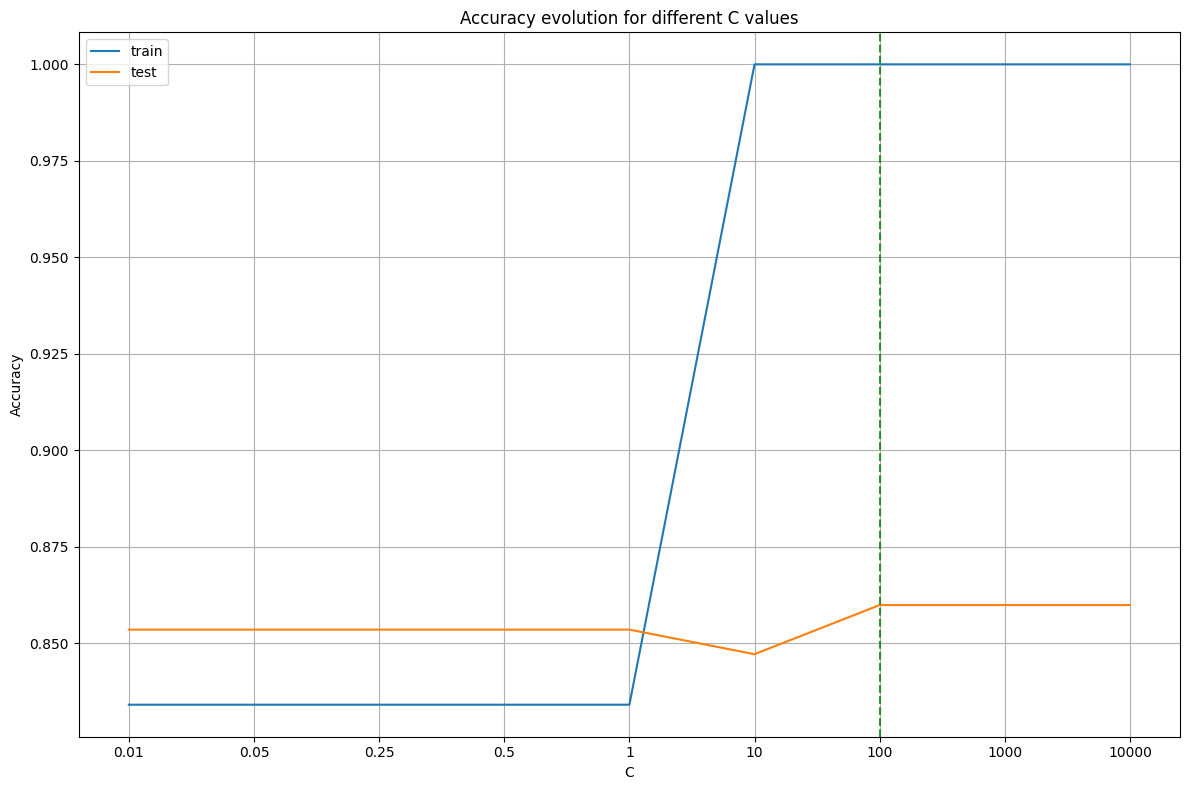

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

<div style="font-size: 150%; font-weight: bold; color: maroon; line-height: 32px">Registro Metricas MLflow</div>

* MLflow está organizado en 4 componentes: Tracking, Projects, Models y Model Registry. Pueden usarse por separado o de manera conjunta.
    *  MLFlow Tracking es un componente de MLflow que registra y rastrea las métricas de ejecución de entrenamiento y los artefactos del modelo,

In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,categoryNum
0,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2,Couldn't get this one to work,1391817600,"02 8, 2014",Negativo,0.0
1,A38NXTZUFB1O2K,0700099867,FiSH,"[1, 1]",I'm not quite finished with the game's DiRT To...,5,Best in the series!,1309219200,"06 28, 2011",Positivo,1.0
2,ANW6EGY12V5XS,0700099867,Henri Savin,"[0, 0]",I have been playing car racing games since the...,5,A 5 stars winner!,1318982400,"10 19, 2011",Positivo,1.0
3,AHT34BRYFBFT1,0700099867,hewimp,"[0, 1]",Dirt 3 on DVDi collect racing games so had to ...,5,Cars,1388275200,"12 29, 2013",Positivo,1.0
4,A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"[0, 0]",I bought this and the key didn't work. It was...,1,"It might have been a good game, but I never fo...",1404086400,"06 30, 2014",Negativo,0.0


In [ ]:
df.overall  = df.overall.astype(float)
df.unixReviewTime    = df.unixReviewTime  .astype(float)

In [ ]:

train, test = train_test_split(df)

X_train = train.drop(["overall"], axis=1)
X_test = test.drop(["overall"], axis=1)
y_train = train[["overall"]]
y_test = test[["overall"]]

In [ ]:
print("Train data shape of X = % s and Y = % s : "%(
    X_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
    X_test.shape, y_test.shape))

Train data shape of X = (470, 10) and Y = (470, 1) : 
Test data shape of X = (157, 10) and Y = (157, 1) : 


In [ ]:
alpha = 0.1
l1_ratio = 0.9

In [ ]:
import numpy as np
import mlflow
from urllib.parse import urlparse
from sklearn.linear_model import ElasticNet

np.random.seed(0)

In [ ]:
with mlflow.start_run():
    # Entrenamiento del modelo
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(X_train_, y_train)

    # Evaluación del modelo
    predicted_qualities = lr.predict(X_test_)
    (rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)


    # Métricas obtenidas
    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    # Registro de métricas en MLflow Tracking
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Registro del modelo
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel")
    else:
        mlflow.sklearn.log_model(lr, "model")

Elasticnet model (alpha=0.100000, l1_ratio=0.900000):
  RMSE: 1.0997807743552233
  MAE: 0.8517685323214528
  R2: -0.0030077735233562386


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
